In [55]:
import os
from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
from dotenv import load_dotenv

from utils.shortcut import quick_get_tooth

load_dotenv()
matplotlib.use('module://matplotlib_inline.backend_inline')

%matplotlib inline


In [56]:
data_dir = Path(os.getenv('DATASET_DIR')) / 'phase-2'
data_dir


PosixPath('/Users/lucyxu/PycharmProjects/datasets/phase-2')

In [57]:
image_paths = list(data_dir.glob('00008026.jpg'))
image_path = image_paths[0]

image_path.name


'00008026.jpg'

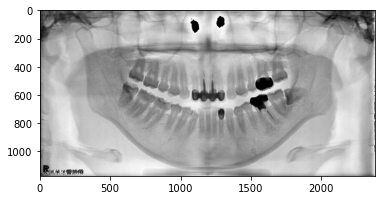

In [58]:
import cv2 as cv

im = cv.imread(str(image_path), cv.IMREAD_GRAYSCALE)

plt.gray()
plt.imshow(1 - im)
plt.show()


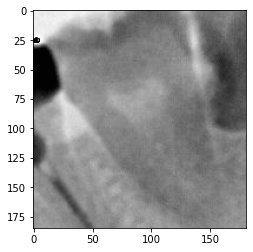

In [62]:
tooth_im, tooth_xyxy = quick_get_tooth(image_path, '37')

h_0, w_0 = tooth_im.shape

plt.imshow(1 - tooth_im)
plt.show()


203 203


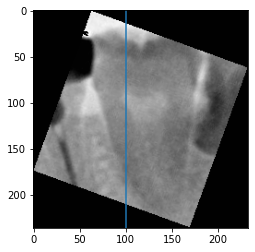

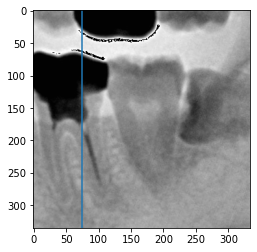

In [90]:
from scipy.ndimage import rotate
from scipy import special
import numpy as np

theta = -20
s, c = special.sindg(abs(theta)), special.cosdg(theta)
expand_size = (50, 50)
# expand_size = None

x_expand, y_expand = int(s * c * h_0), int(s * c * w_0)
if expand_size:
    x_expand += expand_size[0] * 2
    y_expand += expand_size[1] * 2
tooth_xyxy_expand = tooth_xyxy + np.array([-x_expand, -y_expand, x_expand, y_expand])
x1, y1, x2, y2 = tooth_xyxy_expand
tooth_im_expand = im[y1:y2, x1:x2]

r = rotate(tooth_im, theta)
r_e = rotate(tooth_im_expand, theta)

h_0, w_0 = tooth_xyxy[3] - tooth_xyxy[1], tooth_xyxy[2] - tooth_xyxy[0]
h, w = int(h_0 * c + w_0 * s), int(h_0 * s + w_0 * c)
h_e, w_e = r_e.shape

w_padding = (w_e - w) // 2
h_padding = (h_e - h) // 2
print(w_padding, h_padding)
w_padding = (w_e - w) // 2 - expand_size[0]
h_padding = (h_e - h) // 2 - expand_size[1]
# h_padding = int(w_e * s)
# w_padding = int(h_e * s)
# print(w_padding, h_padding)

r_e = r_e[h_padding:-h_padding, w_padding:-w_padding]

plt.imshow(1 - r)
plt.axvline(100)
plt.show()

plt.imshow(1 - r_e)
plt.axvline(75)
plt.show()



# Experiment